## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Data Exploration

1. Check and understand columns in the dataset.

In [2]:
#pd.reset_option("max_rows")
df = pd.read_csv("data/owid-co2-data.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/owid-co2-data.csv'

In [45]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

2. Filtered unused columns.

In [46]:
df_subset = df[['country', 'year', 'iso_code', 'population', 'gdp', 'primary_energy_consumption', 'cement_co2', 'coal_co2', 'consumption_co2', 
                'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2', 'co2', 'co2_including_luc']]
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513


3. Basic exploration.

In [47]:
df_subset.describe(include='all')

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
count,48058,48058.000000,39717,3.949500e+04,1.456400e+04,10103.000000,23764.000000,25075.000000,4718.000000,24992.000000,25083.000000,37022.000000,25111.000000,2593.000000,4398.000000,30308.000000,23320.000000
unique,264,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Macao,NaN,CIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,273,NaN,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1926.842565,NaN,6.083223e+07,2.677586e+11,2435.045751,9.109400,156.963937,1309.603291,3.636449,51.278100,124.515304,112.920681,17.499371,-7.157874,391.272161,534.225708
std,NaN,59.414846,NaN,3.285867e+08,2.103151e+12,11029.856876,66.463548,765.720061,3825.367597,20.916280,316.033834,488.635011,629.451112,41.335944,269.156220,1855.824655,2164.644277
min,NaN,1750.000000,NaN,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-284.799000,0.000000,0.000000,-2367.758000,0.000000,-187.847000
25%,NaN,1883.000000,NaN,3.464375e+05,7.516679e+09,7.453500,0.000000,0.000000,11.404500,0.000000,0.000000,0.047000,0.084000,0.608000,-3.024750,0.183000,5.950750
50%,NaN,1930.000000,NaN,2.456362e+06,2.597999e+10,66.822000,0.029000,0.703000,71.689500,0.000000,0.000000,3.862000,1.323000,2.850000,1.478500,3.856000,27.777000
75%,NaN,1976.000000,NaN,1.008038e+07,1.132942e+11,455.249000,0.834000,16.988000,446.108250,0.000000,1.344500,23.906750,13.916000,10.562000,9.124000,47.277250,124.373750


In [48]:
df_subset.dtypes

country                        object
year                            int64
iso_code                       object
population                    float64
gdp                           float64
primary_energy_consumption    float64
cement_co2                    float64
coal_co2                      float64
consumption_co2               float64
flaring_co2                   float64
gas_co2                       float64
land_use_change_co2           float64
oil_co2                       float64
other_industry_co2            float64
trade_co2                     float64
co2                           float64
co2_including_luc             float64
dtype: object

In [49]:
df_subset[pd.isna(df_subset['iso_code']) == True]

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
173,Africa,1750,NaN,7.627809e+07,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
174,Africa,1751,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
175,Africa,1752,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
176,Africa,1753,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
177,Africa,1754,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47534,World,2018,NaN,7.683790e+09,1.136302e+14,161402.734,1565.803,14725.245,36766.945,407.294,7498.021,4285.146,12267.438,303.145,0.000,36766.945,41052.090
47535,World,2019,NaN,7.764951e+09,NaN,163163.344,1615.776,14684.313,37040.102,435.427,7621.427,4597.514,12377.949,305.210,0.000,37040.102,41637.617
47536,World,2020,NaN,7.840953e+09,NaN,157357.797,1633.047,14225.915,35007.738,398.519,7555.261,4295.186,10899.948,295.048,0.000,35007.738,39302.922
47537,World,2021,NaN,7.909295e+09,NaN,165946.156,1692.404,14982.517,36816.539,403.429,7922.112,4321.578,11514.740,301.340,-0.004,36816.543,41138.121


In [50]:
df_subset[pd.isna(df_subset['iso_code']) == True]['country'].unique()


array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'French Equatorial Africa (Jones et al. 2023)',
       'French West Africa (Jones et al. 2023)', 'High-income countries',
       'International aviation', 'International shipping',
       'International transport', 'Kosovo', 'Kuwaiti Oil Fires (GCP)',
       'Kuwaiti Oil Fires (Jones et al. 2023)',
       'Least developed countries (Jones et al. 2023)',
       'Leeward Islands (GCP)', 'Leeward Islands (Jones et al. 2023)',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle East (GCP)', 'Non-OECD (GCP)', 'North America',
       'North America (GCP)', 'North America (excl. USA)', 'OECD (GCP)',
       'OECD (Jones et al. 2023)', 'Oceania', 'Oceania (GCP)',
       'Panama Canal Zone (GCP)', 'Panama Canal Zo

4. Filtered not country rows.

In [55]:
df_subset = df_subset.drop(df_subset.loc[pd.isna(df_subset['iso_code'])].index)
df_subset.reset_index()
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513


# Data Cleaning

1. Check numerical values. Look for missing values.

In [57]:
df_subset.isna().sum()

country                           0
year                              0
iso_code                          0
population                     2971
gdp                           25169
primary_energy_consumption    30308
cement_co2                    20359
coal_co2                      18445
consumption_co2               35897
flaring_co2                   18383
gas_co2                       18360
land_use_change_co2            5636
oil_co2                       18359
other_industry_co2            38083
trade_co2                     35897
co2                           15852
co2_including_luc             19304
dtype: int64

In [59]:
#% for all cols
df_subset.isna().sum()/df_subset.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     7.480424
gdp                           63.370849
primary_energy_consumption    76.309892
cement_co2                    51.260166
coal_co2                      46.441071
consumption_co2               90.381952
flaring_co2                   46.284966
gas_co2                       46.227056
land_use_change_co2           14.190397
oil_co2                       46.224539
other_industry_co2            95.885893
trade_co2                     90.381952
co2                           39.912380
co2_including_luc             48.603872
dtype: float64

We have a lot of missing values. I will try to find some insights which will help me cleaning more data.

In [60]:
#all countries, where we have lack of co2 emission data
first_valid_index = df_subset.groupby('country')['co2'].apply(lambda x: x.first_valid_index())
first_valid_index[first_valid_index.isna() == True]

country
Monaco        NaN
Puerto Rico   NaN
San Marino    NaN
Vatican       NaN
Name: co2, dtype: float64

Delete all counties with missing values about co2 emission.

In [61]:
for country, index in first_valid_index.items():
    if pd.isna(index):
        df_subset = df_subset.drop(df_subset.loc[df_subset['country'] == country].index)
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513


In [62]:
df_subset.isna().sum()

country                           0
year                              0
iso_code                          0
population                     2859
gdp                           24548
primary_energy_consumption    29660
cement_co2                    19669
coal_co2                      17755
consumption_co2               35207
flaring_co2                   17693
gas_co2                       17670
land_use_change_co2            5465
oil_co2                       17669
other_industry_co2            37393
trade_co2                     35207
co2                           15162
co2_including_luc             18614
dtype: int64

In [63]:
#% for all cols
df_subset.isna().sum()/df_subset.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     7.325698
gdp                           62.900044
primary_energy_consumption    75.998668
cement_co2                    50.398442
coal_co2                      45.494145
consumption_co2               90.211905
flaring_co2                   45.335281
gas_co2                       45.276347
land_use_change_co2           14.003126
oil_co2                       45.273785
other_industry_co2            95.813155
trade_co2                     90.211905
co2                           38.850027
co2_including_luc             47.695185
dtype: float64

6. Charts

<Axes: >

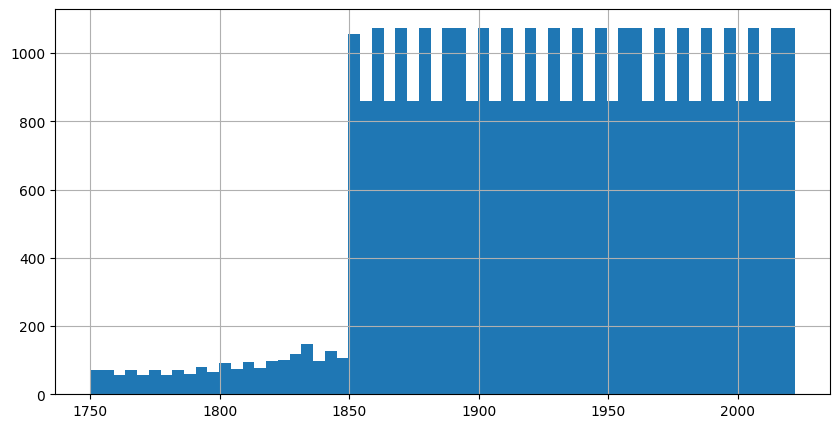

In [64]:
#How many data from different year we have
df_subset['year'].hist(bins = 60, figsize = (10,5))

<Axes: >

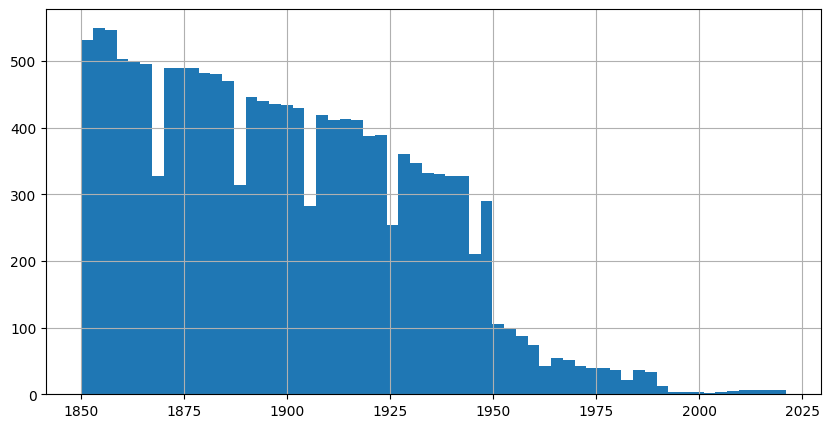

In [65]:
#How many missing values has co2 column per year
df_subset[df_subset['co2'].isna()]['year'].hist(bins = 60, figsize = (10,5))

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'gdp'}>,
        <Axes: title={'center': 'primary_energy_consumption'}>],
       [<Axes: title={'center': 'cement_co2'}>,
        <Axes: title={'center': 'coal_co2'}>,
        <Axes: title={'center': 'consumption_co2'}>,
        <Axes: title={'center': 'flaring_co2'}>],
       [<Axes: title={'center': 'gas_co2'}>,
        <Axes: title={'center': 'land_use_change_co2'}>,
        <Axes: title={'center': 'oil_co2'}>,
        <Axes: title={'center': 'other_industry_co2'}>],
       [<Axes: title={'center': 'trade_co2'}>,
        <Axes: title={'center': 'co2'}>,
        <Axes: title={'center': 'co2_including_luc'}>, <Axes: >]],
      dtype=object)

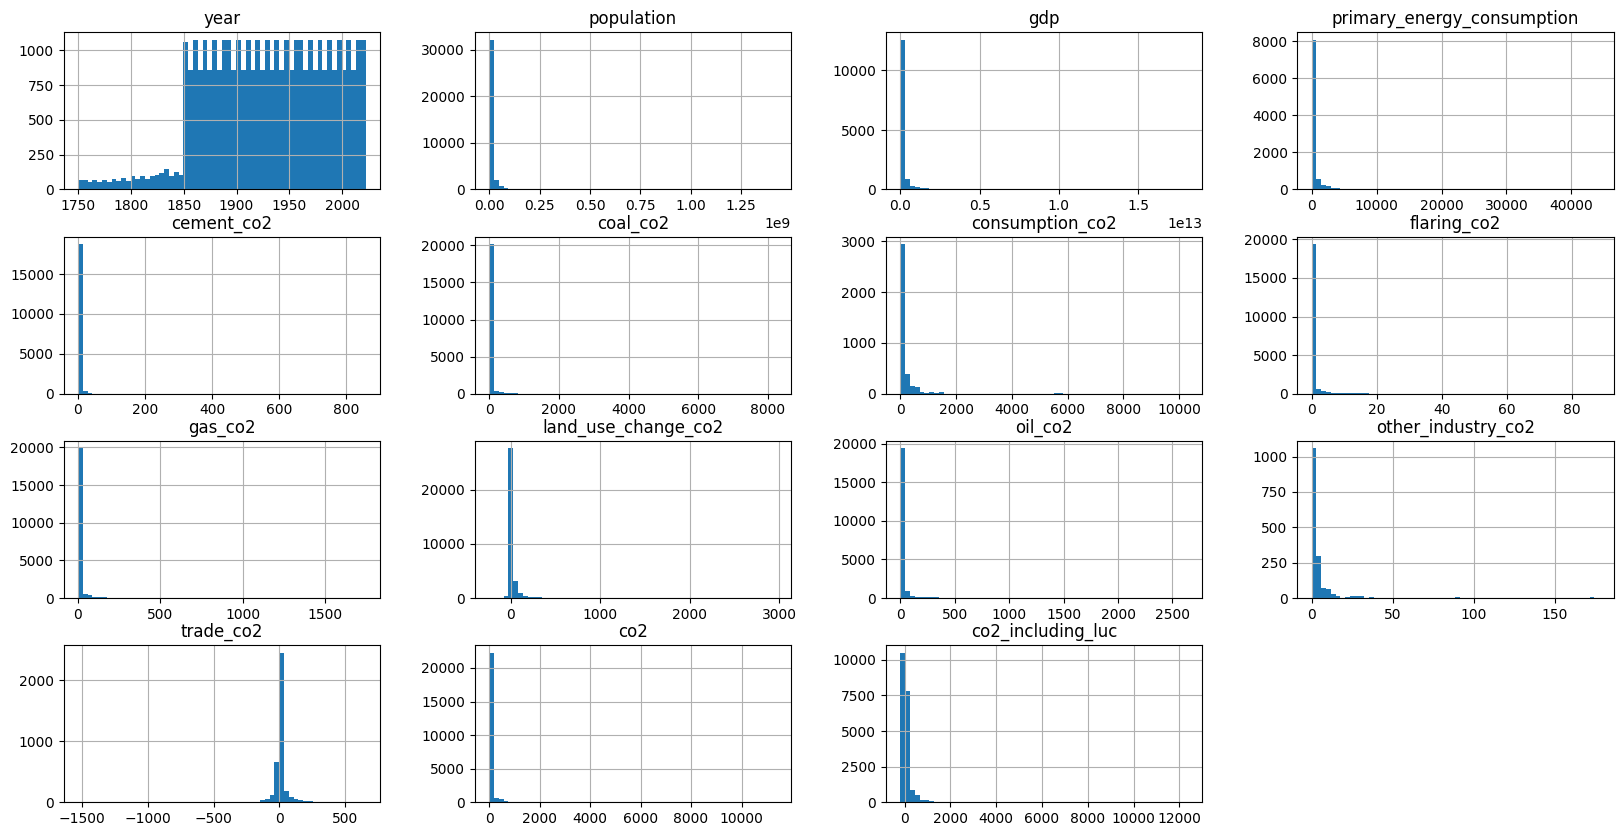

In [66]:
#General check howthe data is distributed for individual columns
df_subset.hist(bins = 60, figsize = (20,10))

In [69]:
#countries with co2 emission more than 2000 million tones
df_subset[df_subset['co2'] > 2000]['country'].value_counts() #how many years

country
United States    82
China            37
Russia           14
India             9
Name: count, dtype: int64

In [70]:
#countries with trade co2 emission more than 500 million tones (import a lot of goods)
df_subset[(df_subset['trade_co2'] > 200)]['country'].value_counts()

country
United States    22
Japan            21
Germany           3
Singapore         1
Name: count, dtype: int64

In [71]:
#countries with trade co2 emission more than 500 million tones (exports a lot of goods)
df_subset[df_subset['trade_co2'] < -200]['country'].value_counts()

country
Russia     32
China      29
India       2
Kuwait      1
Ukraine     1
Name: count, dtype: int64

In [72]:
#countries with co2 emission from other industry more than 50 million tones
df_subset[df_subset['other_industry_co2'] > 50]['country'].value_counts()

country
China    37
Name: count, dtype: int64

In [73]:
#countries with oil co2 emission more than 500 million tones
df_subset[df_subset['oil_co2'] > 500]['country'].value_counts()

country
United States    85
Japan            44
China            27
Russia           23
India             9
Name: count, dtype: int64

In [74]:
#countries with land use change co2 emission more than 1000 million tones
df_subset[df_subset['land_use_change_co2'] > 1000]['country'].value_counts()

country
United States                   64
Brazil                          62
Russia                          34
China                           18
Indonesia                       11
Democratic Republic of Congo     1
Name: count, dtype: int64

In [75]:
#countries with gas co2 emission more than 500 million tones
df_subset[df_subset['gas_co2'] > 500]['country'].value_counts()

country
United States    67
Russia           41
China             5
Name: count, dtype: int64

In [30]:
#countries with flaring co2 emission more than 20 million tones
df_subset[df_subset['flaring_co2'] > 20]['country'].value_counts()

country
United States           52
Iran                    45
Nigeria                 36
Russia                  36
Venezuela               24
Saudi Arabia            16
Iraq                    14
United Arab Emirates     7
Algeria                  4
Kuwait                   4
Libya                    3
Indonesia                2
Australia                1
Name: count, dtype: int64

In [76]:
#countries with consumption co2 emission more than 2000 million tones
df_subset[df_subset['consumption_co2'] > 2000]['country'].value_counts()

country
China            32
United States    32
India             7
Russia            2
Name: count, dtype: int64

In [77]:
#countries with coal co2 emission more than 2000 million tones
df_subset[df_subset['coal_co2'] > 2000]['country'].value_counts()

country
China            32
United States    12
Name: count, dtype: int64

In [78]:
#countries with cement co2 emission more than 200 million tones
df_subset[df_subset['cement_co2'] > 200]['country'].value_counts()

country
China    26
Name: count, dtype: int64

In [79]:
#countries with primary energy consumption co2 emission more than 10000 million tones
df_subset[df_subset['primary_energy_consumption'] > 10000]['country'].value_counts()

country
United States    58
China            29
Russia            4
India             1
Name: count, dtype: int64

In [80]:
#countries with gdp more than 0.5e13
df_subset[df_subset['gdp'] > 0.5e13]['country'].value_counts()

country
United States    48
China            23
India             9
Name: count, dtype: int64

In [81]:
#countries with population more than 0.25e9
df_subset[df_subset['population'] > 0.25e9]['country'].value_counts()

country
China            173
India            154
United States     32
Indonesia         11
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Russia'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'United States')])

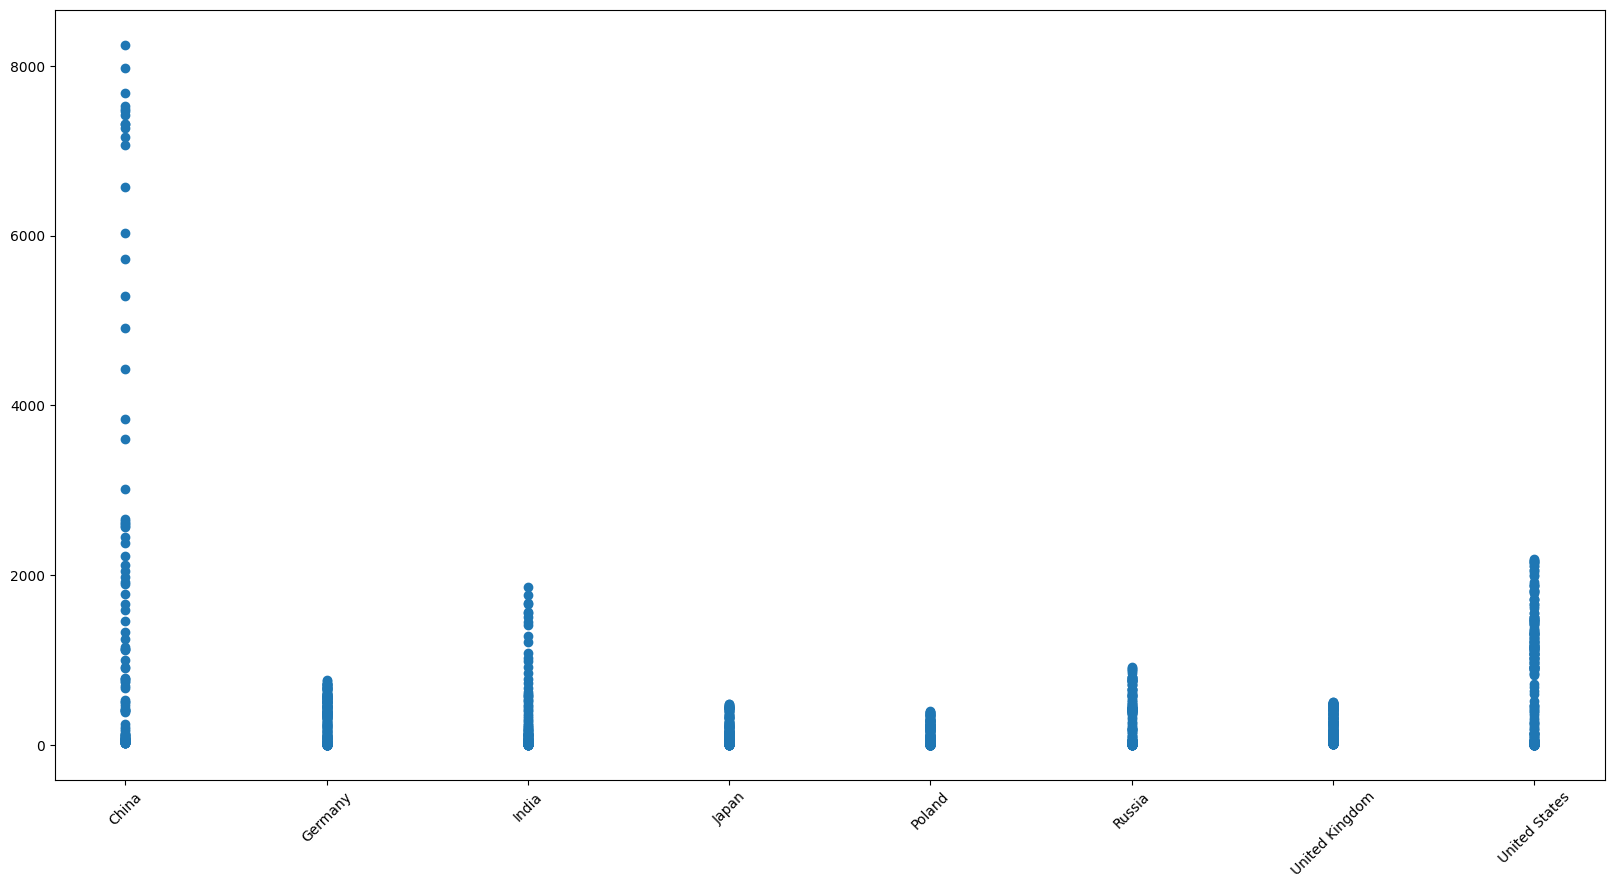

In [82]:
#Filter countries with cumulative coal_co2 greater than 20000
df_sum = df_subset.groupby('country').sum().reset_index()
df_sum = df_sum[df_sum['coal_co2'] >= 20000]

#Get the list of countries from df_sum
countries = df_sum['country'].tolist()

#Filter df_subset for countries with cumulative coal_co2 greater than 20000
df_filtered = df_subset[df_subset['country'].isin(countries)]

plt.scatter(df_filtered['country'], df_filtered['coal_co2'])
plt.gcf().set_size_inches(20, 10)  # Set figure size
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees


In [83]:
#save clean dataset into folder
df_subset.to_csv('data/owid-co2-data-clean.csv', index=False)

In [36]:
df_subset.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'primary_energy_consumption', 'cement_co2', 'coal_co2',
       'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2',
       'oil_co2', 'other_industry_co2', 'trade_co2', 'co2'],
      dtype='object')

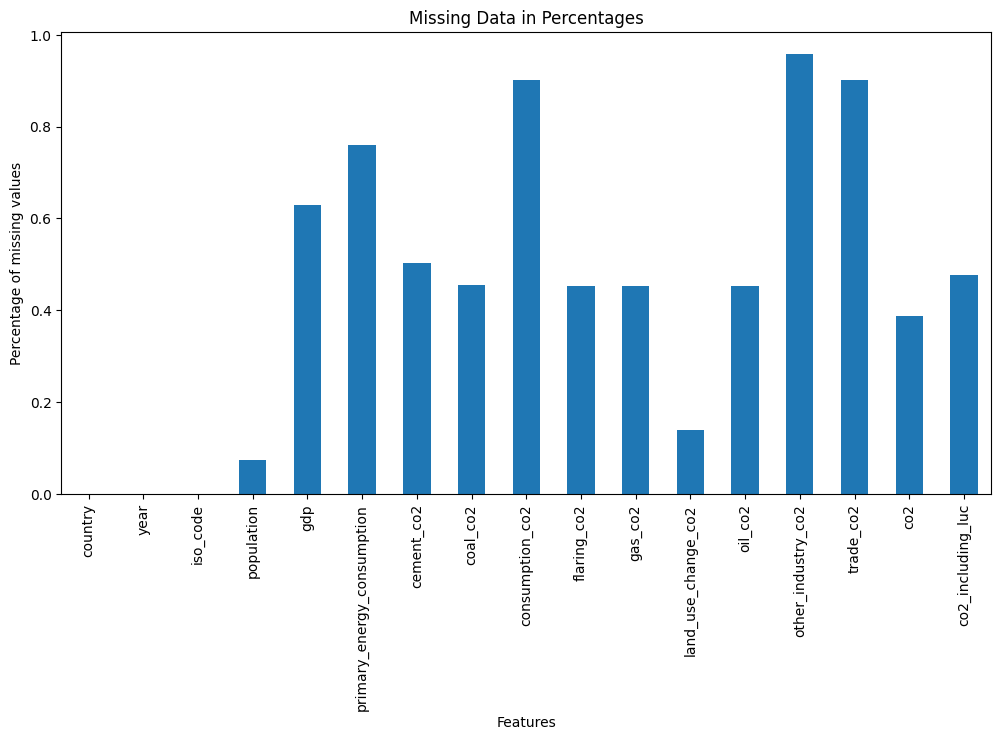

In [84]:
df_subset.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

<Axes: >

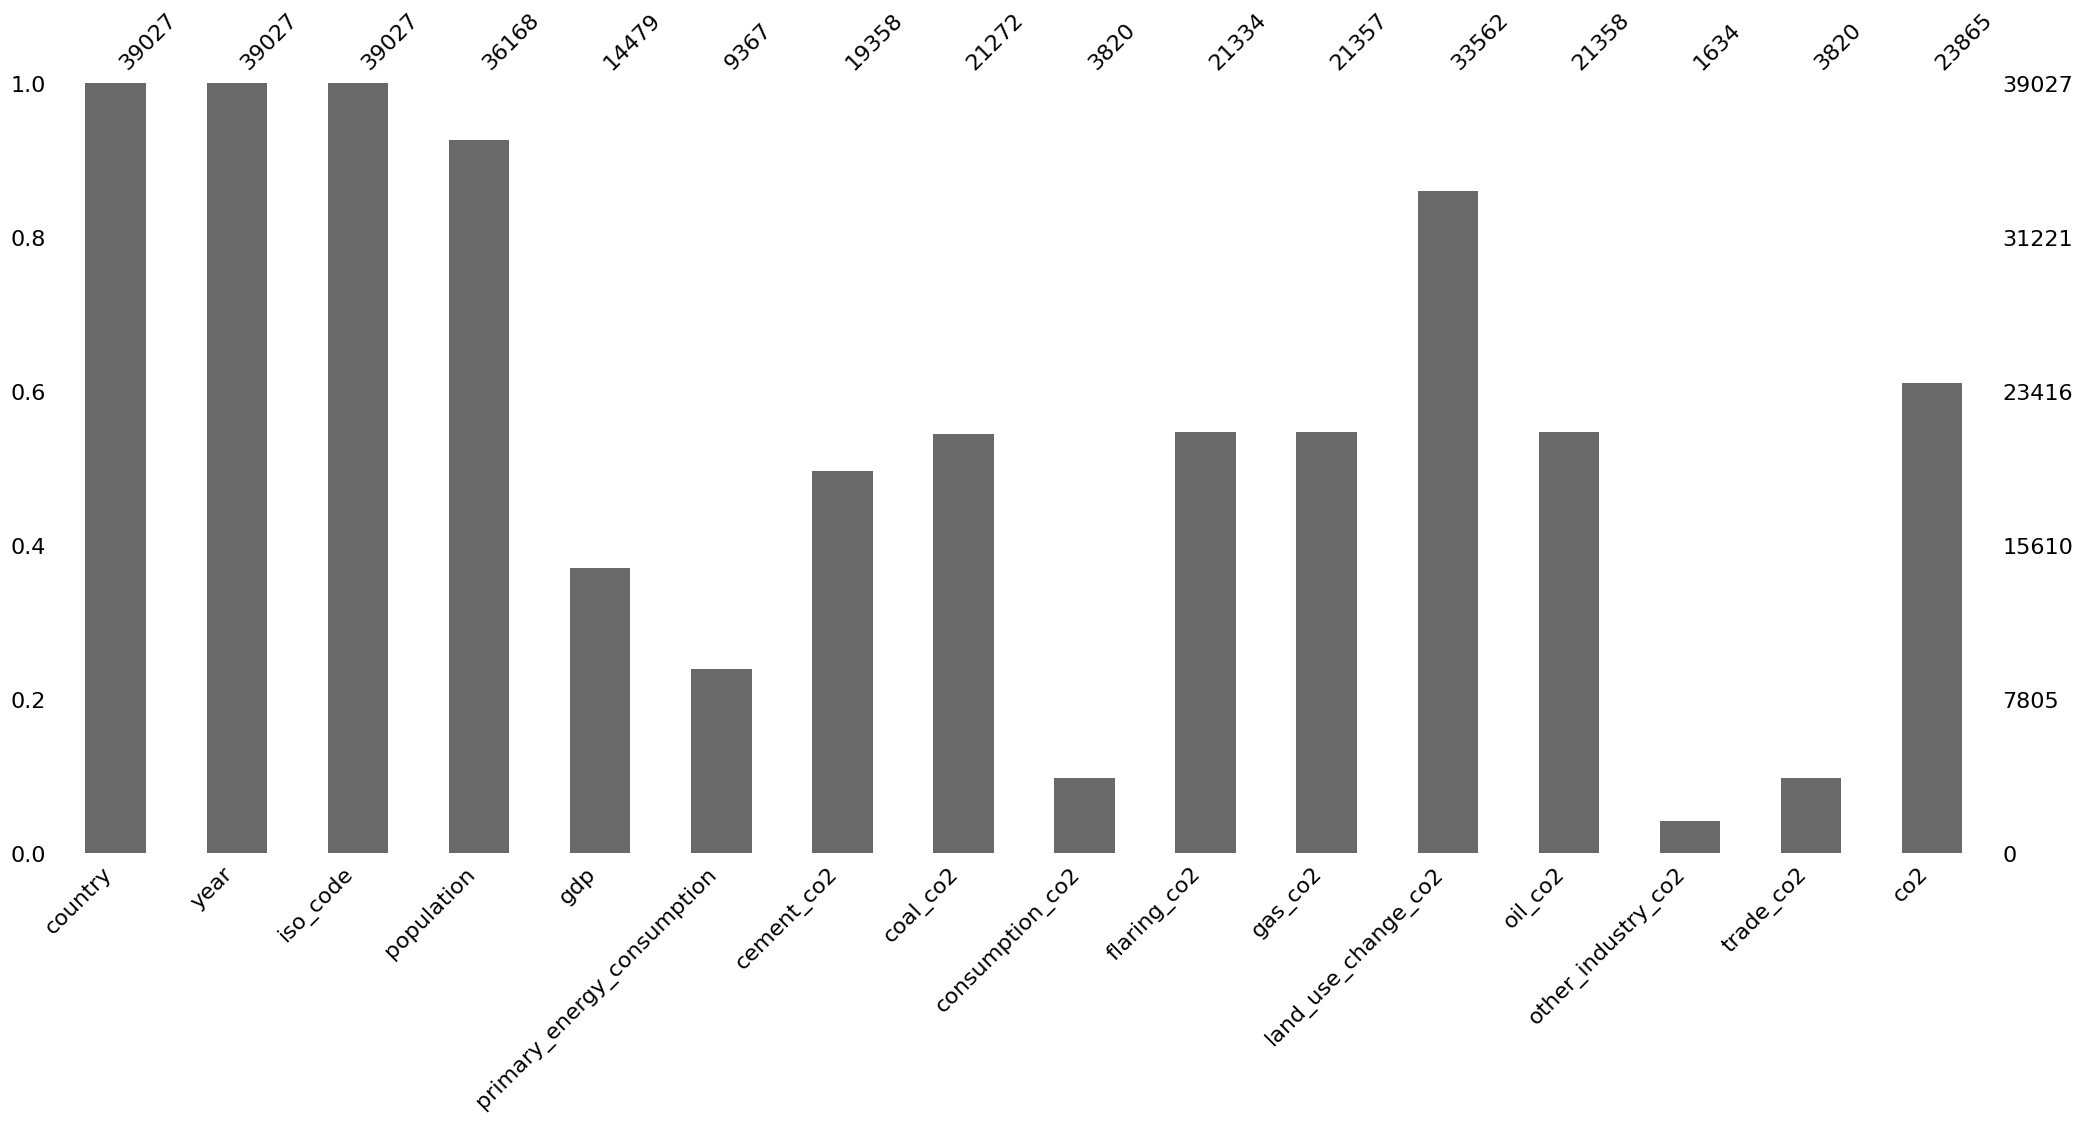

In [39]:
#Check how many missing values I have
msno.bar(df_subset)

<Axes: >

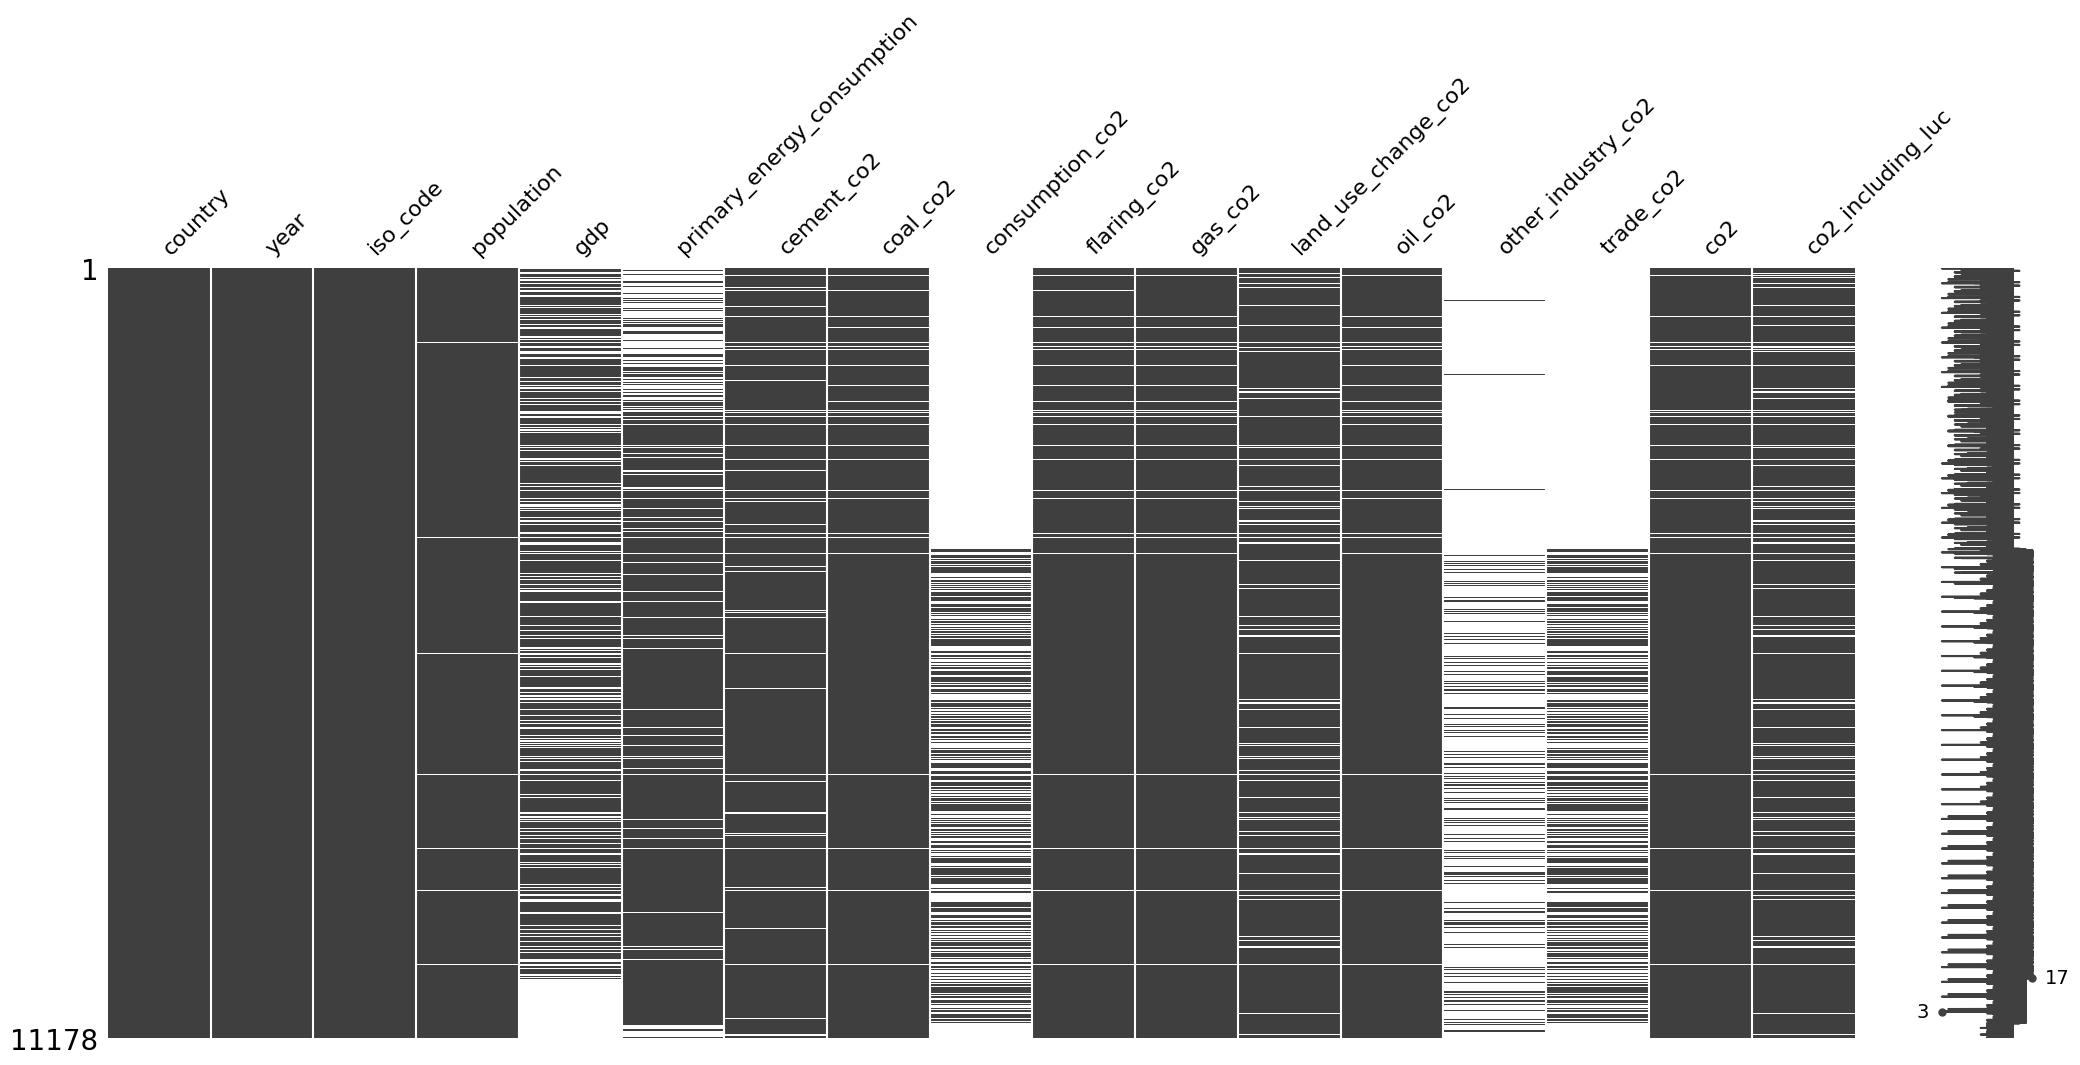

In [93]:
df_sorted = df_subset[df_subset['year'] > 1970].sort_values(by=['year', 'country'])
msno.matrix(df_sorted)

In [95]:
first_energy_consumption_year = df_sorted['primary_energy_consumption'].first_valid_index()
first_consumption_co2_year = df_sorted['consumption_co2'].first_valid_index()
first_other_industry_co2_year = df_sorted['other_industry_co2'].first_valid_index()
first_trade_co2_year = df_sorted['trade_co2'].first_valid_index()

print("Primary_energy_consumption: ", df_sorted.loc[first_energy_consumption_year, 'year'])
print("Consumption_co2: ", df_sorted.loc[first_consumption_co2_year, 'year'])
print("Other_industry_co2: ", df_sorted.loc[first_other_industry_co2_year, 'year'])
print("Trade_co2: ", df_sorted.loc[first_trade_co2_year, 'year'])

Primary_energy_consumption:  1971
Consumption_co2:  1990
Other_industry_co2:  1971
Trade_co2:  1990
